In [166]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [167]:
file_path = 'bestsellers_with_categories.csv'
df = pd.read_csv(file_path)
print(df.head())
shape = df.shape
print(f"Кількість рядків: {shape[0]}")
print(f"Кількість стовпців: {shape[1]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Кількість рядків: 550
Кількість стовпців: 7


In [168]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


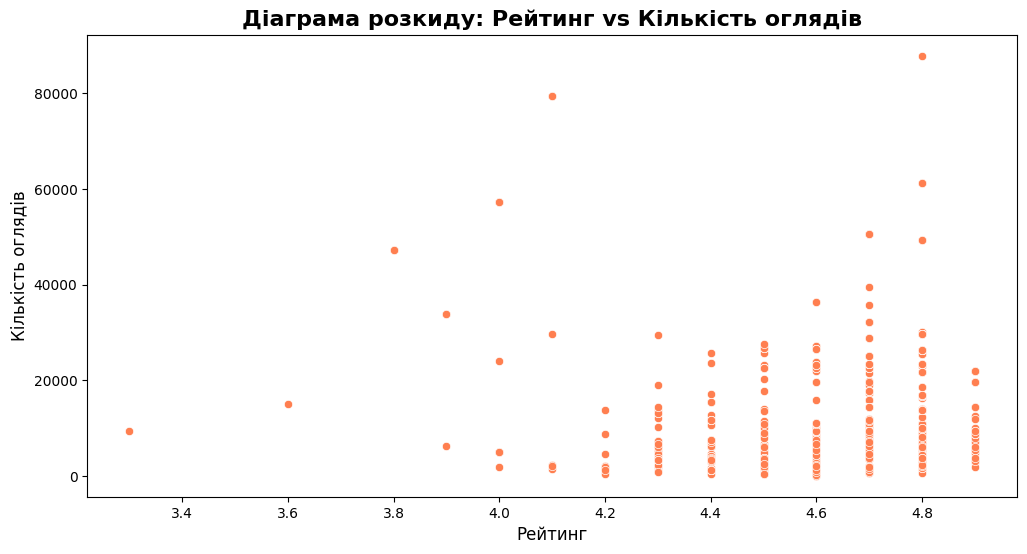

In [169]:
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='user_rating', y='reviews', data=df, color='coral')
plt.title('Діаграма розкиду: Рейтинг vs Кількість оглядів', fontsize=16, fontweight=800)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Кількість оглядів', fontsize=12)
plt.show()

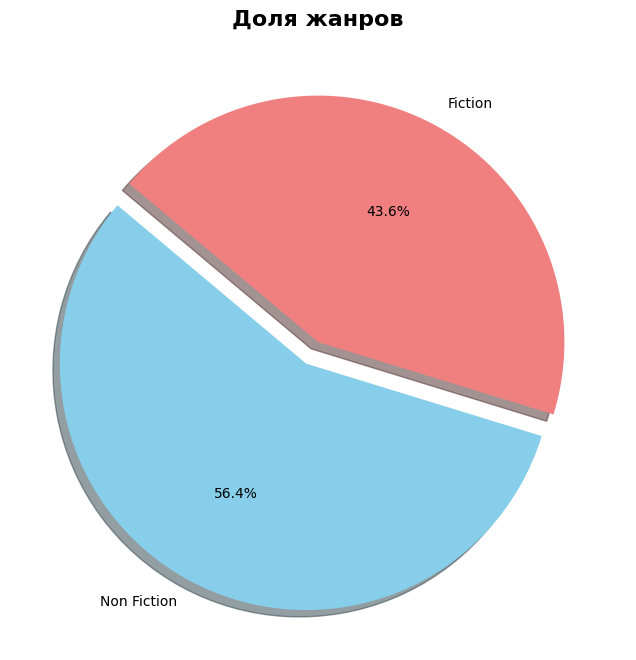

In [170]:
plt.figure(figsize=(8, 8))
genre_counts = df['genre'].value_counts()
explode = (0.1, 0)
colors = ['skyblue', 'lightcoral']
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', explode=explode, colors=colors, shadow=True, startangle=140)
plt.title('Доля жанров', fontsize=16, fontweight='bold')
plt.show()

In [171]:
print("Про скільки книг зберігає дані датасет?")
print(f'Відповідь: Датасет зберігає дані про {shape[0]} книг.')

Про скільки книг зберігає дані датасет?
Відповідь: Датасет зберігає дані про 550 книг.


In [172]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [173]:
missing_data = df.isna().sum()
print(f"Кількість пропусків у кожному стовпці:\n{missing_data}")

Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [174]:
print("Чи є в якихось змінних пропуски?")
if missing_data.sum() == 0:
    print("Відповідь: Ні")
else:
    print("Відповідь: Так")

Чи є в якихось змінних пропуски?
Відповідь: Ні


In [175]:
print("Які є унікальні жанри?")
unique_genres = df['genre'].unique()
print(f'Відповідь: Унікальні значення в стовпці "Genre": {unique_genres}')

Які є унікальні жанри?
Відповідь: Унікальні значення в стовпці "Genre": ['Non Fiction' 'Fiction']


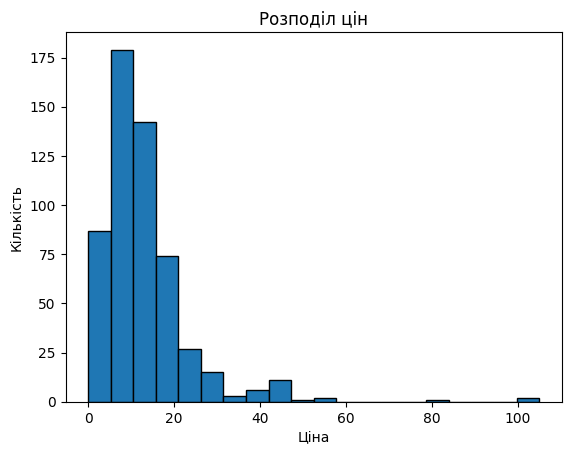

In [176]:
df['price'].plot(kind='hist', edgecolor='black', bins=20)
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.show()


In [177]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = np.median(df['price'])
print("Максимальна ціна?")
print(f"Відповідь: {max_price}")
print("Мінімальна ціна?")
print(f"Відповідь: {min_price}")
print("Середня ціна?")
print(f"Відповідь: {mean_price}")
print("Медіанна ціна?")
print(f"Відповідь: {median_price}")

Максимальна ціна?
Відповідь: 105
Мінімальна ціна?
Відповідь: 0
Середня ціна?
Відповідь: 13.1
Медіанна ціна?
Відповідь: 11.0


In [178]:
print("Який рейтинг у датасеті найвищий?")
max_rating = df['user_rating'].max()
print(f"Відповідь: Найвищий рейтинг у датасеті - {max_rating}")

Який рейтинг у датасеті найвищий?
Відповідь: Найвищий рейтинг у датасеті - 4.9


In [179]:
print("Скільки книг мають такий рейтинг?")
highest_rating_books_count = len(df[df['user_rating'] == max_rating])
print(f"Відповідь: Кількість книг з найвищим рейтингом - {highest_rating_books_count}.")

Скільки книг мають такий рейтинг?
Відповідь: Кількість книг з найвищим рейтингом - 52.


In [180]:
print("Яка книга має найбільше відгуків?")
max_reviews_index = df['reviews'].idxmax()
book_with_max_reviews = df.loc[max_reviews_index]
print(f"Відповідь: Книга з найбільшою кількістю відгуків - \"{book_with_max_reviews['name']}\" {book_with_max_reviews['author']}.")

Яка книга має найбільше відгуків?
Відповідь: Книга з найбільшою кількістю відгуків - "Where the Crawdads Sing" Delia Owens.


In [181]:
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?")
df_2015 = df[(df['year'] == 2015)]
most_expensive_book_2015 = df_2015.loc[df_2015['price'].idxmax()]
print("Відповідь: Книга з Топ-50 у 2015 році та найвищою ціною:")
print("Назва книги:", most_expensive_book_2015['name'])
print("Автор:", most_expensive_book_2015['author'])
print("Ціна:", most_expensive_book_2015['price'])

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: Книга з Топ-50 у 2015 році та найвищою ціною:
Назва книги: Publication Manual of the American Psychological Association, 6th Edition
Автор: American Psychological Association
Ціна: 46


In [182]:
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?")
fiction_2010_df = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
num_fiction_books_2010 = len(fiction_2010_df)
print(f"Відповідь: Кількість книг жанру Fiction у 2010 році складає - {num_fiction_books_2010}.")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
Відповідь: Кількість книг жанру Fiction у 2010 році складає - 20.


In [183]:
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?")
high_rating_books_2010_2011_df = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
# high_rating_books_2010_2011_df = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
num_high_rating_books_2010_2011 = len(high_rating_books_2010_2011_df)
print(f"Відповідь: Кількість книг з рейтингом 4.9 у 2010 та 2011 роках - {num_high_rating_books_2010_2011}.")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
Відповідь: Кількість книг з рейтингом 4.9 у 2010 та 2011 роках - 1.


In [184]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price', ignore_index=True)
print("Книги за ціною менше 8 доларів у 2015 року, відсортовані за зростанням ціни:")
print(sorted_books_2015_under_8)

Книги за ціною менше 8 доларів у 2015 року, відсортовані за зростанням ціни:
                                                 name              author  \
0                               To Kill a Mockingbird          Harper Lee   
1                       Laugh-Out-Loud Jokes for Kids         Rob Elliott   
2                          Knock-Knock Jokes for Kids         Rob Elliott   
3                                     First 100 Words        Roger Priddy   
4                                Giraffes Can't Dance       Giles Andreae   
5   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
6                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
7   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
8                         The Very Hungry Caterpillar          Eric Carle   
9   Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
10                       Baby Touch and Feel: Animals                  DK   

In [185]:
print("Яка книга остання у відсортованому списку?")
last_book = sorted_books_2015_under_8.tail(1)
print(f"Відповідь: Остання книга у відсортованому списку - \"{last_book['name'].values[0]}\" {last_book['author'].values[0]}.")

Яка книга остання у відсортованому списку?
Відповідь: Остання книга у відсортованому списку - "Old School (Diary of a Wimpy Kid #10)" Jeff Kinney.


In [186]:
genre_price_stats = df[['genre', 'price']].groupby('genre').agg(['min', 'max'])
print("Мінімальна та максимальна ціни для кожного жанру:")
print(genre_price_stats)

Мінімальна та максимальна ціни для кожного жанру:
            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [187]:
print("Максимальна ціна для жанру Fiction")
max_price_fiction = genre_price_stats.loc['Fiction', ('price', 'max')]
print(f"Відповідь: Максимальна ціна для жанру Fiction - {max_price_fiction}.")

Максимальна ціна для жанру Fiction
Відповідь: Максимальна ціна для жанру Fiction - 82.


In [188]:
print("Мінімальна ціна для жанру Fiction")
min_price_fiction = genre_price_stats.loc['Fiction', ('price', 'min')]
print(f"Відповідь: Мінімальна ціна для жанру Fiction - {min_price_fiction}.")

Мінімальна ціна для жанру Fiction
Відповідь: Мінімальна ціна для жанру Fiction - 0.


In [189]:
print("Максимальна ціна для жанру Non Fiction")
max_price_fiction = genre_price_stats.loc['Non Fiction', ('price', 'max')]
print(f"Відповідь: Максимальна ціна для жанру Non Fiction - {max_price_fiction}.")

Максимальна ціна для жанру Non Fiction
Відповідь: Максимальна ціна для жанру Non Fiction - 105.


In [190]:
print("Мінімальна ціна для жанру Non Fiction")
min_price_fiction = genre_price_stats.loc['Non Fiction', ('price', 'min')]
print(f"Відповідь: Мінімальна ціна для жанру Non Fiction - {min_price_fiction}.")

Мінімальна ціна для жанру Non Fiction
Відповідь: Мінімальна ціна для жанру Non Fiction - 0.


In [191]:
author_book_counts = df[['author', 'name']].groupby('author').agg('count').reset_index()
author_book_counts.columns = ['author', 'book_count']
print("Датафрейм з кількістю книг для кожного автора:")
print(author_book_counts)


Датафрейм з кількістю книг для кожного автора:
                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [192]:
print("Якої розмірності вийшла таблиця?")
table_shape = author_book_counts.shape
print(f"Відповідь:\nКількість рядків: {table_shape[0]}\nКількість стовпців: {table_shape[1]}")

Якої розмірності вийшла таблиця?
Відповідь:
Кількість рядків: 248
Кількість стовпців: 2


In [193]:
print("Який автор має найбільше книг?")
max_books_author = author_book_counts.loc[author_book_counts['book_count'].idxmax()]
print(f"Відповідь: Автор з найбільшою кількістю книг - {max_books_author['author']}.")

Який автор має найбільше книг?
Відповідь: Автор з найбільшою кількістю книг - Jeff Kinney.


In [194]:
print("Скільки книг цього автора?")
max_books_count = max_books_author['book_count']
print(f"Відповідь: Кількість книг - {max_books_count}.")

Скільки книг цього автора?
Відповідь: Кількість книг - 12.


In [195]:
author_avg_rating = df[['author', 'user_rating']].groupby('author').agg('mean').round(1).reset_index()
author_avg_rating.columns = ['author', 'average_rating']
print("Датафрейм з середнім рейтингом для кожного автора:")
print(author_avg_rating)


Датафрейм з середнім рейтингом для кожного автора:
                         author  average_rating
0              Abraham Verghese             4.6
1                Adam Gasiewski             4.4
2                 Adam Mansbach             4.8
3                     Adir Levy             4.8
4    Admiral William H. McRaven             4.7
..                          ...             ...
243             Walter Isaacson             4.6
244               William Davis             4.4
245            William P. Young             4.6
246            Wizards RPG Team             4.8
247                Zhi Gang Sha             4.6

[248 rows x 2 columns]


In [196]:
print("У якого автора середній рейтинг мінімальний?")
min_avg_rating_author = author_avg_rating.loc[author_avg_rating['average_rating'].idxmin()]
print(f"Відповідь: Автор з мінімальним середнім рейтингом - {min_avg_rating_author['author']}.")

У якого автора середній рейтинг мінімальний?
Відповідь: Автор з мінімальним середнім рейтингом - Donna Tartt.


In [197]:
print("Який у цього автора середній рейтинг?")
min_avg_rating = min_avg_rating_author['average_rating']
print(f"Відповідь: Мінімальним середнім рейтинг - {min_avg_rating}.")

Який у цього автора середній рейтинг?
Відповідь: Мінімальним середнім рейтинг - 3.9.


In [198]:
merged_df = pd.concat([author_book_counts.set_index('author'), author_avg_rating.set_index('author')], axis=1)
print("З'єднаний датафрейм:")
print(merged_df)

З'єднаний датафрейм:
                            book_count  average_rating
author                                                
Abraham Verghese                     2             4.6
Adam Gasiewski                       1             4.4
Adam Mansbach                        1             4.8
Adir Levy                            1             4.8
Admiral William H. McRaven           1             4.7
...                                ...             ...
Walter Isaacson                      3             4.6
William Davis                        2             4.4
William P. Young                     2             4.6
Wizards RPG Team                     3             4.8
Zhi Gang Sha                         2             4.6

[248 rows x 2 columns]


In [199]:
sorted_merged_df = merged_df.sort_values(by=['book_count', 'average_rating']).reset_index()
print("Відсортований датафрейм:")
print(sorted_merged_df)

Відсортований датафрейм:
                                 author  book_count  average_rating
0                        Muriel Barbery           1             4.0
1                          Chris Cleave           1             4.1
2                     Ian K. Smith M.D.           1             4.1
3                          Pierre Dukan           1             4.1
4                      Elizabeth Strout           1             4.2
..                                  ...         ...             ...
243  American Psychological Association          10             4.5
244                        Gary Chapman          11             4.7
245                     Suzanne Collins          11             4.7
246                        Rick Riordan          11             4.8
247                         Jeff Kinney          12             4.8

[248 rows x 3 columns]


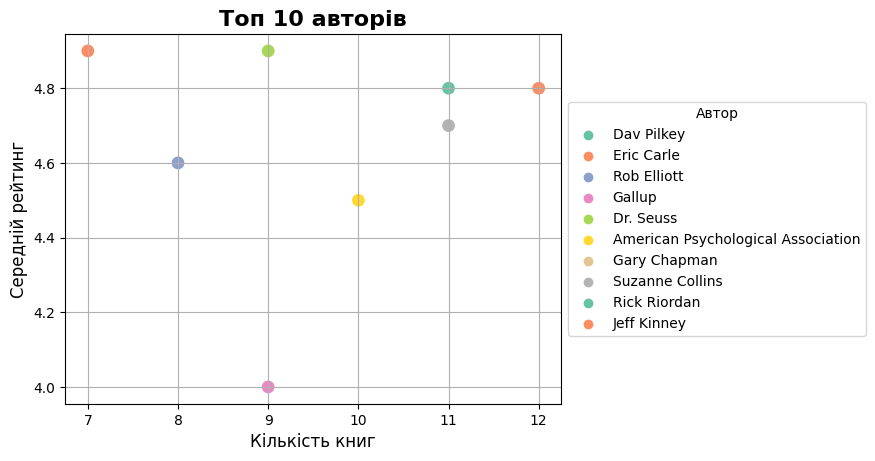

In [200]:
top_10_authors = sorted_merged_df.tail(10)
scatter = sns.scatterplot(x=top_10_authors['book_count'],
                          y=top_10_authors['average_rating'],
                          hue=top_10_authors['author'],
                          s=100,
                          palette='Set2')
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Автор')
plt.xlabel('Кількість книг', fontsize=12)
plt.ylabel('Середній рейтинг', fontsize=12)
plt.title('Топ 10 авторів', fontsize=16, fontweight=800)
plt.grid(True)
plt.show()

In [201]:
print("Який автор перший у списку?")
first_author = sorted_merged_df.iloc[0]['author']
print(f"Відповідь: {first_author}.")

Який автор перший у списку?
Відповідь: Muriel Barbery.
